In [47]:
### import pandas as pd
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
path = "../data/data.xlsx"
df = pd.read_excel(path)
df.Дата = df.Дата.astype('datetime64[ns]')

Названия столбцов:

In [130]:
df.columns

Index(['Дата', 'Количество вагонов', 'Макс. число вагонов в сходе',
       'Общее количество вагонов', 'Количество сшедших вагонов', 'Скорость',
       'Вес', 'Загрузка', 'Стрелочный перевод', 'Кривизна', 'Профиль пути',
       'Режим движения'],
      dtype='object')

In [131]:
print("shape of data frame:", df.shape)

shape of data frame: (56, 12)


In [132]:
df.head()

,Дата,Количество вагонов,Макс. число вагонов в сходе,Общее количество вагонов,Количество сшедших вагонов,Скорость,Вес,Загрузка,Стрелочный перевод,Кривизна,Профиль пути,Режим движения
0,2013-01-08,56.0,19.0,58.0,1,57.0,3402.0,0.547101,0,0.000000,0.0007,NaN
1,2013-01-09,60.0,25.0,62.0,1,72.0,4082.0,0.652657,0,0.000000,0.0009,NaN
2,2013-01-10,60.0,4.0,64.0,1,15.0,4420.0,0.734300,0,0.001639,NaN,3.0
3,2013-01-12,66.0,63.0,68.0,21,67.0,5699.0,0.918094,0,0.002326,0.0060,NaN
4,2013-01-19,67.0,34.0,69.0,1,69.0,5854.0,0.932944,0,0.000000,0.0006,2.0


In [133]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Дата                         56 non-null     datetime64[ns]
 1   Количество вагонов           54 non-null     float64       
 2   Макс. число вагонов в сходе  51 non-null     float64       
 3   Общее количество вагонов     54 non-null     float64       
 4   Количество сшедших вагонов   56 non-null     int64         
 5   Скорость                     53 non-null     float64       
 6   Вес                          54 non-null     float64       
 7   Загрузка                     54 non-null     float64       
 8   Стрелочный перевод           56 non-null     int64         
 9   Кривизна                     46 non-null     float64       
 10  Профиль пути                 44 non-null     float64       
 11  Режим движения               33 non-null     fl

In [134]:
df.describe()

,Количество вагонов,Макс. число вагонов в сходе,Общее количество вагонов,Количество сшедших вагонов,Скорость,Вес,Загрузка,Стрелочный перевод,Кривизна,Профиль пути,Режим движения
count,54.000000,51.000000,54.000000,56.000000,53.000000,54.000000,54.000000,56.000000,46.000000,44.000000,33.000000
mean,63.870370,37.137255,66.407407,3.875000,49.150943,5126.629630,0.817678,0.107143,0.000806,-0.000384,1.666667
std,9.790342,21.543463,10.053665,6.081455,18.450971,1438.743887,0.243936,0.312094,0.001171,0.005689,0.777282
min,24.000000,2.000000,26.000000,1.000000,9.000000,998.000000,0.179710,0.000000,0.000000,-0.011500,1.000000
25%,60.000000,17.500000,62.500000,1.000000,35.000000,4155.500000,0.690451,0.000000,0.000000,-0.004750,1.000000
50%,66.000000,43.000000,68.000000,1.000000,51.000000,5722.000000,0.925519,0.000000,0.000000,0.000000,1.000000
75%,68.000000,56.500000,71.750000,2.250000,64.000000,6010.250000,0.995586,0.000000,0.001479,0.001875,2.000000
max,96.000000,72.000000,100.000000,26.000000,78.000000,8806.000000,1.076087,1.000000,0.005000,0.010900,3.000000


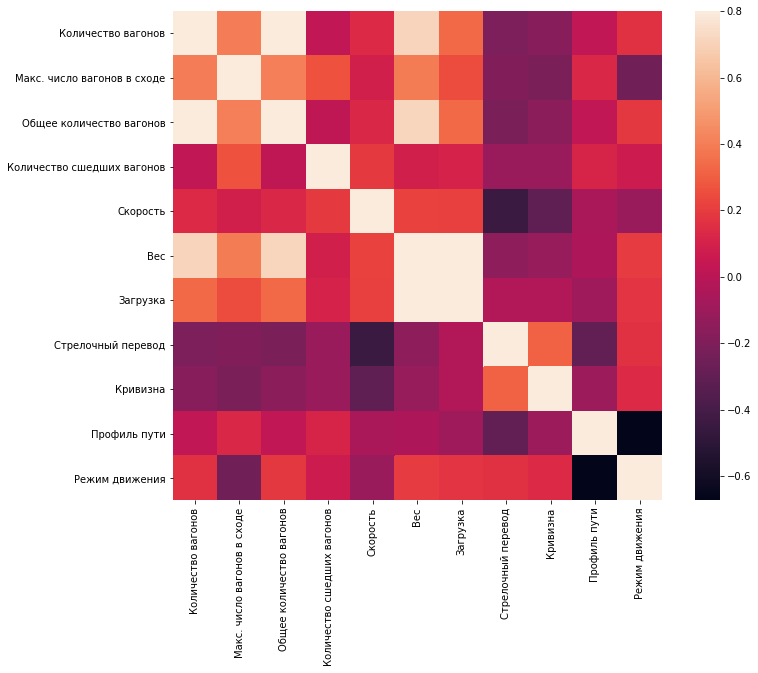

In [135]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


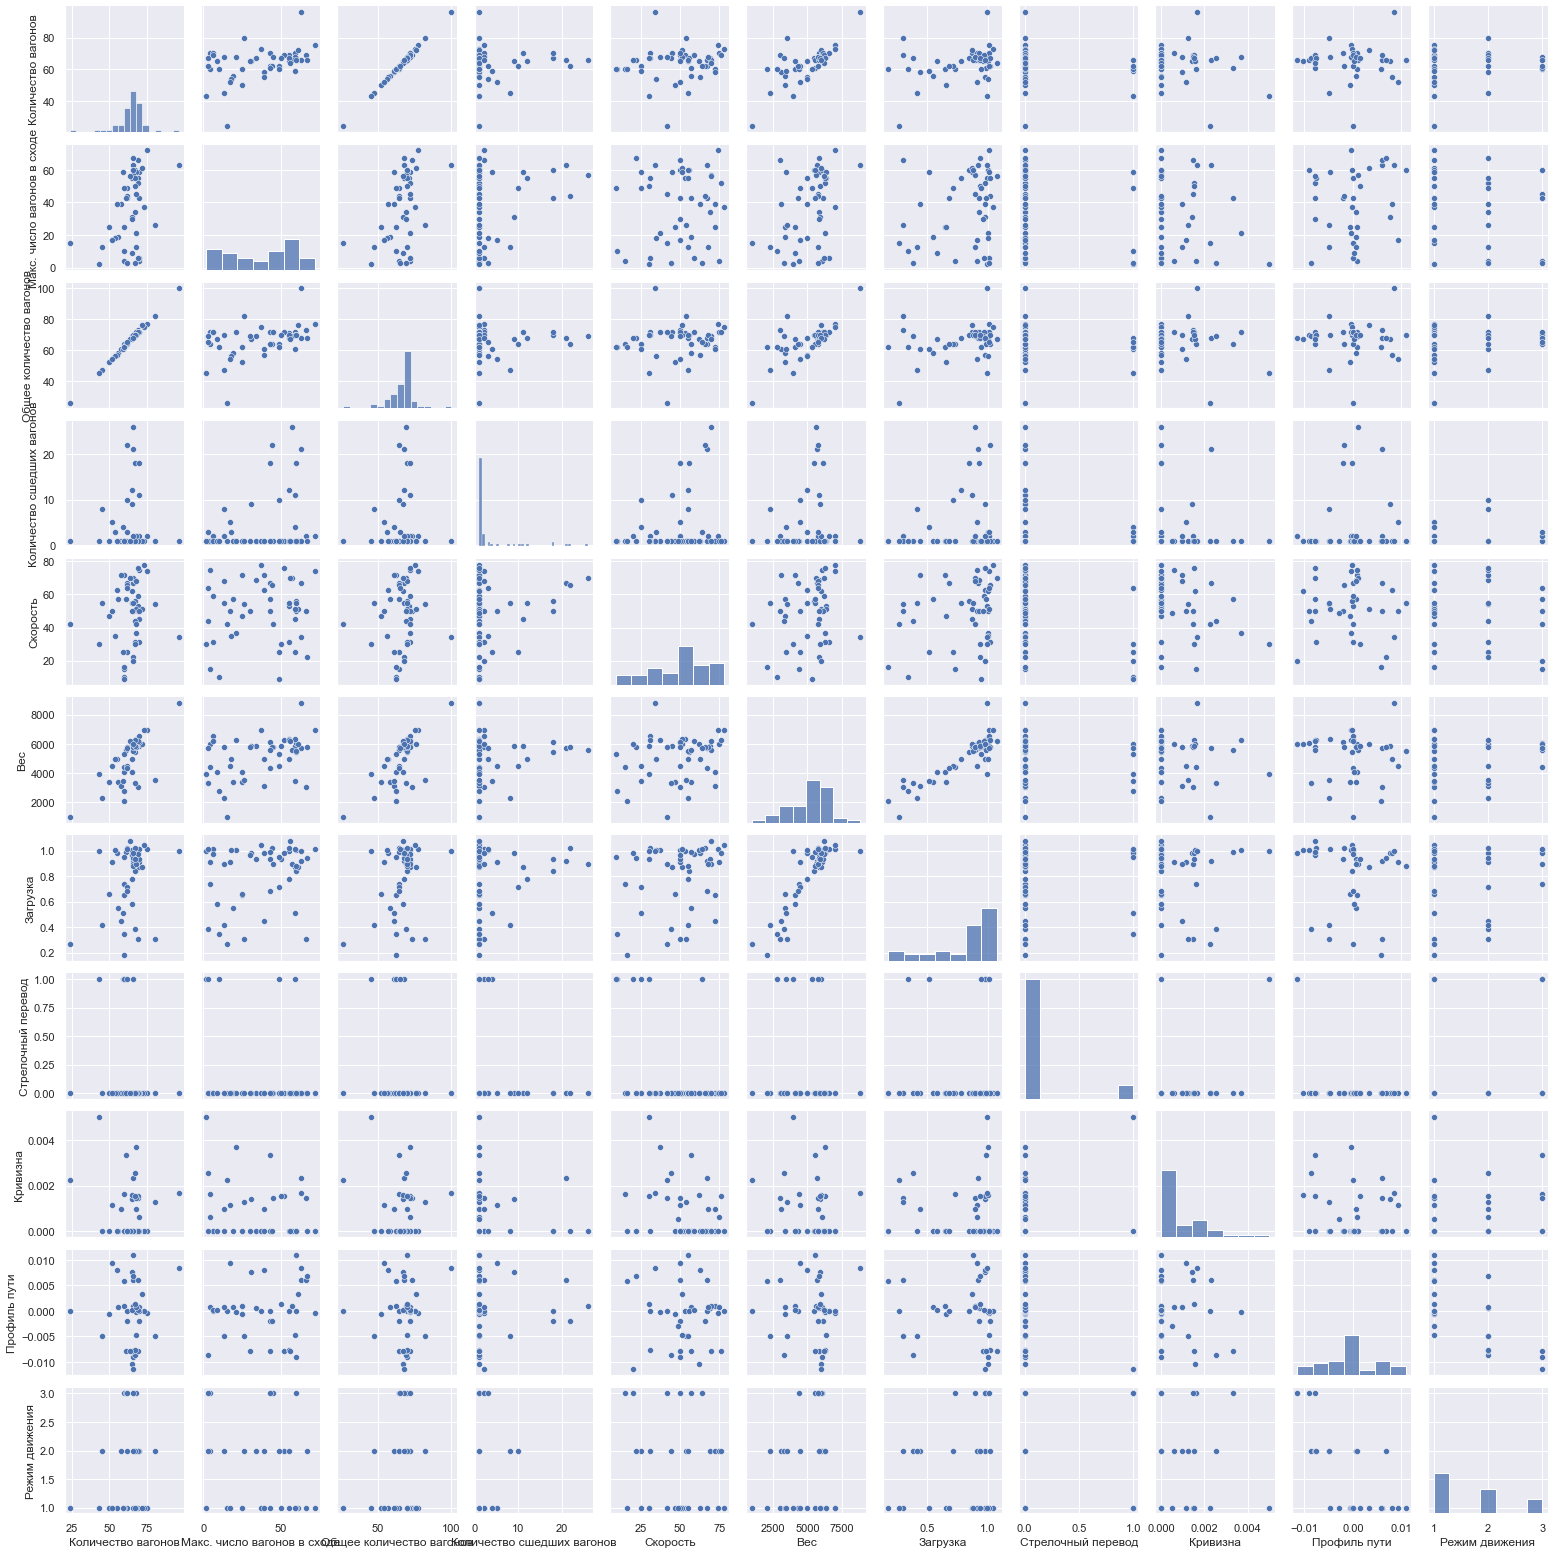

In [137]:
sns.set()
sns.pairplot(df[:], size = 2.5)
plt.show();

In [50]:
data = 
y = df["Количество сшедших вагонов"]
X = df.drop(["Количество сшедших вагонов"], axis = 1)

x = X["Загрузка"]
x = np.array(x)
y = np.array(y)

xy = 0
x_sum = 0
for i in range(len(y)):
    if math.isnan(x[i]):
        x[i] = 0.7
    xy += x[i] * y[i]
    x_sum += x[i]
theta = (2*len(y) - xy) / x_sum
print(theta)

-1.6196923220736308
